In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pd.options.display.max_rows = 10

C:\Users\Jergb\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Lee el dataset
dataframe = pd.read_csv('casas.csv')
dataframe.iloc[:,1:]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [3]:
dataframe.iloc[:,1:].head(500).describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,500.000000,500.000000,500.000000,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000
mean,-116.367240,33.415900,19.258000,3443.898000,712.3300,1569.166000,559.936000,3.119426,123016.804000
std,0.648784,0.598551,8.616026,3054.969847,627.1964,1269.731271,474.633672,1.442208,71221.764743
min,-116.990000,32.560000,2.000000,42.000000,10.0000,9.000000,3.000000,0.499900,22500.000000
25%,-116.920000,32.820000,14.000000,1370.250000,287.0000,695.750000,245.750000,2.060600,69400.000000
50%,-116.520000,33.500000,18.000000,2595.500000,514.5000,1258.500000,443.000000,2.825700,100000.000000
75%,-115.997500,33.810000,24.000000,4429.250000,866.5000,2098.750000,717.250000,3.868775,158500.000000
max,-114.310000,36.000000,52.000000,19107.000000,3923.0000,7985.000000,3232.000000,10.294800,500001.000000


In [4]:
# Transforma los datos en un arreglo de numpy
dataset = dataframe.iloc[:,1:].head(500).values
# Divide los datos de entrada y los de salida
X = dataset[:,0:8]
Y = dataset[:,8]

In [5]:
# Define el modelo base
def baseline_model():
    # Crea el modelo
    model = Sequential()
    # Añade una capa 2D
    # Dense(Dimensiones del espacio de salida, dimensión de entrada,
    # inicializador para la matriz de ponderaciones, función de activación relu)
    # El número de nodos equivalen al número de entradas
    model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
    # Añade una capa 2D con una salidan inicializador normal
    # El número de nodos corresponde al número de salidas
    model.add(Dense(1, kernel_initializer='normal'))
    # Configura el proceso de aprendizaje del modelo
    # loss permite evalúar el grado de error entre las salidas caluculadas
    # y las salidas deseadas.
    # optimizer permite calcular los pesos a partir de los datos de entrada
    # y la función de pérdidas.
    # la métrica permite monitorizar el proceso de aprendizaje.
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
    return model


In [6]:
baseline_model()

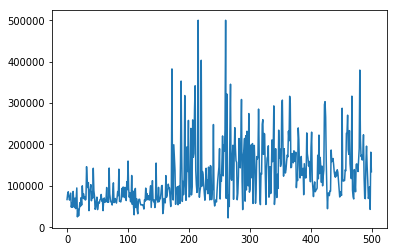

In [7]:
plt.plot(Y)
plt.show()

In [8]:
# Semillas para la generación de números aleatorios
seed = 7
np.random.seed(seed)
# Evalúa el estimador 
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

In [9]:
# Se utiliza un método de validación cruzada de 10 divisiones
kfold = KFold(n_splits=10, random_state=seed)
# Evalúa los puntajes de la validación cruzada
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Promedio MSE: %.2f \nDesviación Estandar MSE:%.2f" \
      % (results.mean(), results.std()))

Promedio MSE: -8335934145.44 
Desviación Estandar MSE:(4984376842.16)


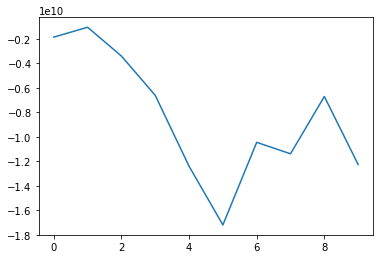

71150.50733220097

In [12]:
plt.plot(results)
plt.show()
Y.mean()
Y.std()